In [366]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

%matplotlib inline
from sklearn.linear_model import LinearRegression,LassoCV, Ridge, LassoLarsCV,ElasticNetCV
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
import xgboost as xgb
import warnings

warnings.filterwarnings('ignore')

In [690]:
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)


In [691]:
# Load data
##### Load train and Test set
train = pd.read_csv("train (1).csv")
test = pd.read_csv("test (2).csv")

In [692]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [693]:
test.shape

(1459, 80)

In [694]:
train.shape

(1460, 81)

In [695]:
# Which types of features
# 37 features
train.select_dtypes(include=['int64','float64']).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [696]:
# 43 features
train.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [697]:
train = train.drop(labels = ["Id"],axis = 1)
test = test.drop(labels = ["Id"],axis = 1)

In [698]:
#dataset=train.copy()

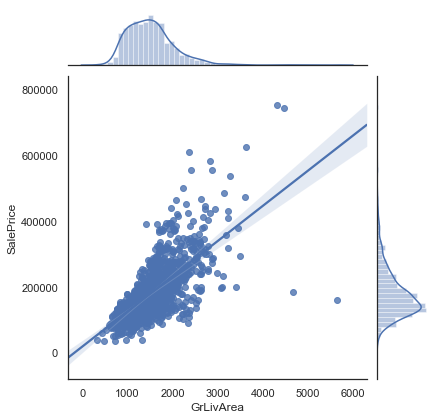

In [680]:
g = sns.jointplot(x = train['GrLivArea'], y = train['SalePrice'],kind="reg")

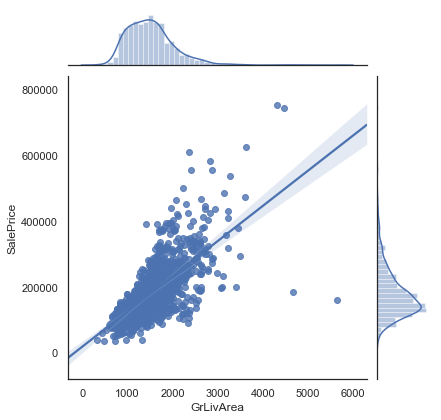

In [681]:
g = sns.jointplot(x = train['GrLivArea'], y = train['SalePrice'],kind="reg")

In [699]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [700]:
dataset = train.copy()

In [701]:
# Infos
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [702]:
dataset = dataset.fillna(np.nan)
test = dataset.fillna(np.nan)

In [703]:
missing_features = dataset.columns[dataset.isnull().any()]
missing_features1 = test.columns[test.isnull().any()]

In [704]:
missing_features

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [705]:

dataset["Alley"] = dataset["Alley"].fillna("No")

dataset["MiscFeature"] = dataset["MiscFeature"].fillna("No")

dataset["Fence"] = dataset["Fence"].fillna("No")

dataset["PoolQC"] = dataset["PoolQC"].fillna("No")

dataset["FireplaceQu"] = dataset["FireplaceQu"].fillna("No")


test["Alley"] = test["Alley"].fillna("No")

test["MiscFeature"] = test["MiscFeature"].fillna("No")

test["Fence"] = test["Fence"].fillna("No")

test["PoolQC"] = test["PoolQC"].fillna("No")

test["FireplaceQu"] = test["FireplaceQu"].fillna("No")

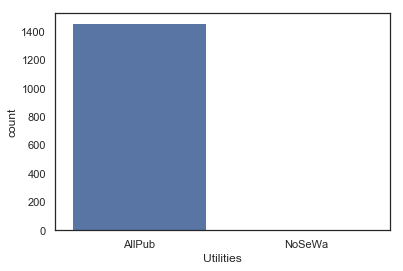

In [706]:
g = sns.countplot(dataset["Utilities"])

In [707]:
dataset["Utilities"] = dataset["Utilities"].fillna("AllPub")
test["Utilities"] = test["Utilities"].fillna("AllPub")

In [708]:
dataset["BsmtCond"] = dataset["BsmtCond"].fillna("No")
dataset["BsmtQual"] = dataset["BsmtQual"].fillna("No")
dataset["BsmtFinType2"] = dataset["BsmtFinType2"].fillna("No")
dataset["BsmtFinType1"] = dataset["BsmtFinType1"].fillna("No")
dataset.loc[dataset["BsmtCond"] == "No","BsmtUnfSF"] = 0
dataset.loc[dataset["BsmtFinType1"] == "No","BsmtFinSF1"] = 0
dataset.loc[dataset["BsmtFinType2"] == "No","BsmtFinSF2"] = 0
dataset.loc[dataset["BsmtQual"] == "No","TotalBsmtSF"] = 0
dataset.loc[dataset["BsmtCond"] == "No","BsmtHalfBath"] = 0
dataset.loc[dataset["BsmtCond"] == "No","BsmtFullBath"] = 0
dataset["BsmtExposure"] = dataset["BsmtExposure"].fillna("No")

test["BsmtCond"] = test["BsmtCond"].fillna("No")
test["BsmtQual"] = test["BsmtQual"].fillna("No")
test["BsmtFinType2"] = test["BsmtFinType2"].fillna("No")
test["BsmtFinType1"] = test["BsmtFinType1"].fillna("No")
test.loc[test["BsmtCond"] == "No","BsmtUnfSF"] = 0
test.loc[test["BsmtFinType1"] == "No","BsmtFinSF1"] = 0
test.loc[test["BsmtFinType2"] == "No","BsmtFinSF2"] = 0
test.loc[test["BsmtQual"] == "No","TotalBsmtSF"] = 0
test.loc[test["BsmtCond"] == "No","BsmtHalfBath"] = 0
test.loc[test["BsmtCond"] == "No","BsmtFullBath"] = 0
test["BsmtExposure"] = test["BsmtExposure"].fillna("No")

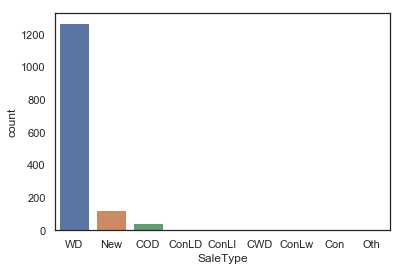

In [709]:
g = sns.countplot(dataset["SaleType"])

dataset["SaleType"] = dataset["SaleType"].fillna("WD")
test["SaleType"] = test["SaleType"].fillna("WD")

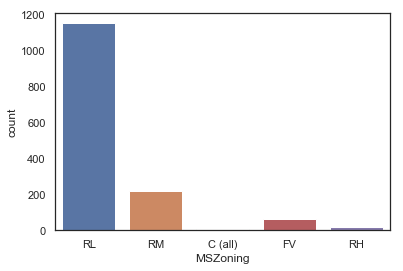

In [710]:
g = sns.countplot(dataset["MSZoning"])

dataset["MSZoning"] = dataset["MSZoning"].fillna("RL")
test["MSZoning"] = test["MSZoning"].fillna("RL")

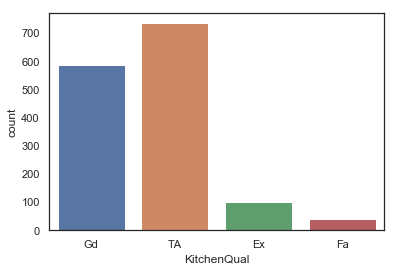

In [711]:
g = sns.countplot(dataset["KitchenQual"])

dataset["KitchenQual"] = dataset["KitchenQual"].fillna("TA")
test["KitchenQual"] = test["KitchenQual"].fillna("TA")

In [712]:
dataset["GarageType"] = dataset["GarageType"].fillna("No")
dataset["GarageFinish"] = dataset["GarageFinish"].fillna("No")
dataset["GarageQual"] = dataset["GarageQual"].fillna("No")
dataset["GarageCond"] = dataset["GarageCond"].fillna("No")
dataset.loc[dataset["GarageType"] == "No","GarageYrBlt"] = dataset["YearBuilt"][dataset["GarageType"]=="No"]
dataset.loc[dataset["GarageType"] == "No","GarageCars"] = 0
dataset.loc[dataset["GarageType"] == "No","GarageArea"] = 0
dataset["GarageArea"] = dataset["GarageArea"].fillna(dataset["GarageArea"].median())
dataset["GarageCars"] = dataset["GarageCars"].fillna(dataset["GarageCars"].median())
dataset["GarageYrBlt"] = dataset["GarageYrBlt"].fillna(dataset["GarageYrBlt"].median())

test["GarageType"] = test["GarageType"].fillna("No")
test["GarageFinish"] = test["GarageFinish"].fillna("No")
test["GarageQual"] = test["GarageQual"].fillna("No")
test["GarageCond"] = test["GarageCond"].fillna("No")
test.loc[test["GarageType"] == "No","GarageYrBlt"] = dataset["YearBuilt"][dataset["GarageType"]=="No"]
test.loc[test["GarageType"] == "No","GarageCars"] = 0
test.loc[test["GarageType"] == "No","GarageArea"] = 0
test["GarageArea"] = test["GarageArea"].fillna(test["GarageArea"].median())
test["GarageCars"] = test["GarageCars"].fillna(test["GarageCars"].median())
test["GarageYrBlt"] = test["GarageYrBlt"].fillna(test["GarageYrBlt"].median())

In [713]:
test["MasVnrType"] = test["MasVnrType"].fillna("None")
test.loc[test["MasVnrType"] == "None","MasVnrArea"] = 0

dataset["MasVnrType"] = dataset["MasVnrType"].fillna("None")
dataset.loc[dataset["MasVnrType"] == "None","MasVnrArea"] = 0

In [714]:
dataset = dataset.replace({'MSSubClass': {20: 'SubClass_20', 30: 'SubClass_30',40: 'SubClass_40',
45: 'SubClass_45',50: 'SubClass_50',60: 'SubClass_60',70: 'SubClass_70',
75: 'SubClass_75',80: 'SubClass_80',85: 'SubClass_85',90: 'SubClass_90',
120: 'SubClass_120',150: 'SubClass_150',160: 'SubClass_160',180: 'SubClass_180',
190: 'SubClass_190'}})

test = test.replace({'MSSubClass': {20: 'SubClass_20', 30: 'SubClass_30',40: 'SubClass_40',
45: 'SubClass_45',50: 'SubClass_50',60: 'SubClass_60',70: 'SubClass_70',
75: 'SubClass_75',80: 'SubClass_80',85: 'SubClass_85',90: 'SubClass_90',
120: 'SubClass_120',150: 'SubClass_150',160: 'SubClass_160',180: 'SubClass_180',
190: 'SubClass_190'}})

In [715]:
dataset = dataset.replace({'MoSold': {1: 'Jan', 2: 'Feb',3: 'Mar',
4: 'Apr',5: 'May',6: 'Jun',7: 'Jul',8: 'Aug',9: 'Sep',10: 'Oct',
11: 'Nov',12: 'Dec'}})

test = test.replace({'MoSold': {1: 'Jan', 2: 'Feb',3: 'Mar',
4: 'Apr',5: 'May',6: 'Jun',7: 'Jul',8: 'Aug',9: 'Sep',10: 'Oct',
11: 'Nov',12: 'Dec'}})

In [716]:
dataset['YrSold'] = dataset['YrSold'].astype(str)

test['YrSold'] = test['YrSold'].astype(str)

In [717]:
# Categorical values
# Ordered
dataset["BsmtCond"] = dataset["BsmtCond"].astype("category",categories=['No','Po','Fa','TA','Gd','Ex'],ordered=True).cat.codes
dataset["BsmtExposure"] = dataset["BsmtExposure"].astype("category",categories=['No','Mn','Av','Gd'],ordered=True).cat.codes
dataset["BsmtFinType1"] = dataset["BsmtFinType1"].astype("category",categories=['No','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],ordered=True).cat.codes
dataset["BsmtFinType2"] = dataset["BsmtFinType2"].astype("category",categories=['No','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],ordered=True).cat.codes
dataset["BsmtQual"] = dataset["BsmtQual"].astype("category",categories=['No','Po','Fa','TA','Gd','Ex'],ordered=True).cat.codes
dataset["ExterCond"] = dataset["ExterCond"].astype("category",categories=['Po','Fa','TA','Gd','Ex'],ordered=True).cat.codes
dataset["ExterQual"] = dataset["ExterQual"].astype("category",categories=['Po','Fa','TA','Gd','Ex'],ordered=True).cat.codes
dataset["Fence"] = dataset["Fence"].astype("category",categories=['No','MnWw','GdWo','MnPrv','GdPrv'],ordered=True).cat.codes
dataset["FireplaceQu"] = dataset["FireplaceQu"].astype("category",categories=['No','Po','Fa','TA','Gd','Ex'],ordered=True).cat.codes
dataset["Functional"] = dataset["Functional"].astype("category",categories=['Sal','Sev','Maj2','Maj1','Mod','Min2','Min1','Typ'],ordered=True).cat.codes
dataset["GarageCond"] = dataset["GarageCond"].astype("category",categories=['No','Po','Fa','TA','Gd','Ex'],ordered=True).cat.codes
dataset["GarageFinish"] = dataset["GarageFinish"].astype("category",categories=['No','Unf','RFn','Fin'],ordered=True).cat.codes
dataset["GarageQual"] = dataset["GarageQual"].astype("category",categories=['No','Po','Fa','TA','Gd','Ex'],ordered=True).cat.codes
dataset["HeatingQC"] = dataset["HeatingQC"].astype("category",categories=['Po','Fa','TA','Gd','Ex'],ordered=True).cat.codes
dataset["KitchenQual"] = dataset["KitchenQual"].astype("category",categories=['Po','Fa','TA','Gd','Ex'],ordered=True).cat.codes
dataset["PavedDrive"] = dataset["PavedDrive"].astype("category",categories=['N','P','Y'],ordered=True).cat.codes
dataset["PoolQC"] = dataset["PoolQC"].astype("category",categories=['No','Fa','TA','Gd','Ex'],ordered=True).cat.codes
dataset["Utilities"] = dataset["Utilities"].astype("category",categories=['ELO','NoSeWa','NoSewr','AllPub'],ordered=True).cat.codes

# Categorical values
# Ordered
test["BsmtCond"] = test["BsmtCond"].astype("category",categories=['No','Po','Fa','TA','Gd','Ex'],ordered=True).cat.codes
test["BsmtExposure"] = test["BsmtExposure"].astype("category",categories=['No','Mn','Av','Gd'],ordered=True).cat.codes
test["BsmtFinType1"] = test["BsmtFinType1"].astype("category",categories=['No','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],ordered=True).cat.codes
test["BsmtFinType2"] = test["BsmtFinType2"].astype("category",categories=['No','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],ordered=True).cat.codes
test["BsmtQual"] = test["BsmtQual"].astype("category",categories=['No','Po','Fa','TA','Gd','Ex'],ordered=True).cat.codes
test["ExterCond"] = test["ExterCond"].astype("category",categories=['Po','Fa','TA','Gd','Ex'],ordered=True).cat.codes
test["ExterQual"] = test["ExterQual"].astype("category",categories=['Po','Fa','TA','Gd','Ex'],ordered=True).cat.codes
test["Fence"] = test["Fence"].astype("category",categories=['No','MnWw','GdWo','MnPrv','GdPrv'],ordered=True).cat.codes
test["FireplaceQu"] = test["FireplaceQu"].astype("category",categories=['No','Po','Fa','TA','Gd','Ex'],ordered=True).cat.codes
test["Functional"] = test["Functional"].astype("category",categories=['Sal','Sev','Maj2','Maj1','Mod','Min2','Min1','Typ'],ordered=True).cat.codes
test["GarageCond"] = test["GarageCond"].astype("category",categories=['No','Po','Fa','TA','Gd','Ex'],ordered=True).cat.codes
test["GarageFinish"] = test["GarageFinish"].astype("category",categories=['No','Unf','RFn','Fin'],ordered=True).cat.codes
test["GarageQual"] = test["GarageQual"].astype("category",categories=['No','Po','Fa','TA','Gd','Ex'],ordered=True).cat.codes
test["HeatingQC"] = test["HeatingQC"].astype("category",categories=['Po','Fa','TA','Gd','Ex'],ordered=True).cat.codes
test["KitchenQual"] = test["KitchenQual"].astype("category",categories=['Po','Fa','TA','Gd','Ex'],ordered=True).cat.codes
test["PavedDrive"] = test["PavedDrive"].astype("category",categories=['N','P','Y'],ordered=True).cat.codes
test["PoolQC"] = test["PoolQC"].astype("category",categories=['No','Fa','TA','Gd','Ex'],ordered=True).cat.codes
test["Utilities"] = test["Utilities"].astype("category",categories=['ELO','NoSeWa','NoSewr','AllPub'],ordered=True).cat.codes


In [718]:
# non ordered
dataset = pd.get_dummies(dataset,columns=["Alley","BldgType","CentralAir",
"Condition1","Condition2","Electrical","Exterior1st","Exterior2nd","Foundation",
"GarageType","Heating","HouseStyle","LandContour","LandSlope","LotConfig","LotShape",
"MSZoning","MasVnrType","MiscFeature","Neighborhood","RoofMatl","RoofStyle",
"SaleCondition","SaleType","Street","MSSubClass",'MoSold','YrSold'],drop_first=True)

# non ordered
test = pd.get_dummies(test,columns=["Alley","BldgType","CentralAir",
"Condition1","Condition2","Electrical","Exterior1st","Exterior2nd","Foundation",
"GarageType","Heating","HouseStyle","LandContour","LandSlope","LotConfig","LotShape",
"MSZoning","MasVnrType","MiscFeature","Neighborhood","RoofMatl","RoofStyle",
"SaleCondition","SaleType","Street","MSSubClass",'MoSold','YrSold'],drop_first=True)

In [719]:
dataset = dataset.drop(labels=['Condition2_PosN',
                               'MSSubClass_SubClass_160'],axis = 1)

test = test.drop(labels=['Condition2_PosN',
                               'MSSubClass_SubClass_160'],axis = 1)

In [720]:
from sklearn.preprocessing import PowerTransformer

In [721]:
dataset["SalePrice"] = np.log1p(dataset["SalePrice"])
#p=PowerTransformer()
#dataset['SalePrice']=pd.DataFrame(p.fit_transform(dataset["SalePrice"].to_frame()))
Y = dataset["SalePrice"]
dataset = dataset.drop(labels="SalePrice",axis = 1)

In [722]:
dataset.select_dtypes(['int64','float64']).columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

In [723]:
from sklearn import preprocessing

In [724]:
from sklearn.preprocessing import Normalizer,RobustScaler 

In [725]:
features = dataset.columns

LotF = dataset["LotFrontage"]
dataset = dataset.drop("LotFrontage",axis= 1)

LotF1 = test["LotFrontage"]
test = test.drop("LotFrontage",axis= 1)

In [726]:
cop=dataset.copy()
cop1=test.copy()

In [727]:
pt = preprocessing.QuantileTransformer(output_distribution='normal')
dataset=pd.DataFrame(pt.fit_transform(dataset),columns=cop.columns)

pt = preprocessing.QuantileTransformer(output_distribution='normal')
test=pd.DataFrame(pt.fit_transform(test),columns=cop1.columns)

In [728]:
dataset=pd.DataFrame(Normalizer().fit_transform(dataset),columns=cop.columns)

test=pd.DataFrame(Normalizer().fit_transform(test),columns=cop1.columns)

In [729]:
pt = preprocessing.QuantileTransformer(output_distribution='normal')
dataset=pd.DataFrame(pt.fit_transform(dataset),columns=cop.columns)

pt = preprocessing.QuantileTransformer(output_distribution='normal')
test=pd.DataFrame(pt.fit_transform(test),columns=cop1.columns)

In [730]:
dataset=pd.concat([dataset,LotF],1)

test=pd.concat([test,LotF1],1)

In [731]:
# Predict LotFrontage with other descriptors using a LassoCV Regression model
X_train_LotF = dataset[LotF.notnull()] 
X_train_LotF.drop('LotFrontage',1,inplace=True)
Y_train_LotF = LotF[LotF.notnull()] # Get the LotFrontage non missing values
# Log transform the data

# Predict LotFrontage with other descriptors using a LassoCV Regression model
X_train_LotF1 = test[LotF1.notnull()] 
X_train_LotF1.drop('LotFrontage',1,inplace=True)
Y_train_LotF1 = LotF1[LotF1.notnull()] # Get the LotFrontage non missing values
# Log transform the data

In [732]:
# Get data to predict (LotFrontage missing)
test_LotF = dataset[LotF.isnull()]
test_LotF.drop('LotFrontage',1,inplace=True)

# Get data to predict (LotFrontage missing)
test_LotF1 = test[LotF1.isnull()]
test_LotF1.drop('LotFrontage',1,inplace=True)

In [733]:
lassocv = LassoCV(eps=1e-8)

cv_results = cross_val_score(lassocv,X_train_LotF,Y_train_LotF,cv=5,scoring="r2",n_jobs=4)
print(cv_results.mean())

lassocv = LassoCV(eps=1e-8)

cv_results1 = cross_val_score(lassocv,X_train_LotF1,Y_train_LotF1,cv=5,scoring="r2",n_jobs=4)
print(cv_results1.mean())

0.4975126217154563
0.495579537260381


In [734]:
lassocv.fit(X_train_LotF,Y_train_LotF)

LotF_pred = lassocv.predict(test_LotF)

LotF[LotF.isnull()] = LotF_pred

lassocv.fit(X_train_LotF1,Y_train_LotF1)

LotF_pred1 = lassocv.predict(test_LotF1)

LotF1[LotF1.isnull()] = LotF_pred1

In [735]:
cop=pd.concat([cop,LotF],1)
#cop=pd.concat([cop,y],1)

cop1=pd.concat([cop1,LotF1],1)
#cop=pd.concat([cop,y],1)

In [736]:
pt = preprocessing.QuantileTransformer(output_distribution='normal')
cop=pd.DataFrame(pt.fit_transform(cop),columns=cop.columns)

pt = preprocessing.QuantileTransformer(output_distribution='normal')
cop1=pd.DataFrame(pt.fit_transform(cop1),columns=cop1.columns)


In [737]:

cop=pd.DataFrame(Normalizer().fit_transform(cop),columns=cop.columns)


cop1=pd.DataFrame(Normalizer().fit_transform(cop1),columns=cop1.columns)


In [738]:
pt = preprocessing.QuantileTransformer(output_distribution='normal')
dataset=pd.DataFrame(pt.fit_transform(cop),columns=cop.columns)

pt = preprocessing.QuantileTransformer(output_distribution='normal')
test=pd.DataFrame(pt.fit_transform(cop1),columns=cop1.columns)

In [740]:
dataset.head()

,LotArea,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,Alley_No,Alley_Pave,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,CentralAir_Y,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandSlope_Mod,LandSlope_Sev,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotShape_IR2,LotShape_IR3,LotShape_Reg,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MiscFeature_No,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave,MSSubClass_SubClass_180,MSSubClass_SubClass_190,MSSubClass_SubClass_20,MSSubClass_SubClass_30,MSSubClass_SubClass_40,MSSubClass_SubClass_45,MSSubClass_SubClass_50,MSSubClass_SubClass_60,MSSubClass_SubClass_70,MSSubClass_SubClass_75,MSSubClass_SubClass_80,MSSubClass_SubClass_85,MSSubClass_SubClass_90,MoSold_Aug,MoSold_Dec,MoSold_Feb,MoSold_Jan,MoSold_Jul,MoSold_Jun,MoSold_Mar,MoSold_May,MoSold_Nov,MoSold_Oct,MoSold_Sep,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,LotFrontage
0,-0.387133,0.338833,0.674005,-0.639310,0.853710,0.614791,0.815913,0.989469,-0.387047,0.611894,0.267816,-0.734699,1.293542,0.667534,-0.469306,-0.543503,-0.931633,-0.456397,1.035504,-0.807054,0.981623,-0.346777,0.532007,0.825846,-0.421951,0.711929,0.781392,0.226470,-0.346777,0.721565,0.984915,0.438752,-1.497368,-1.497368,0.833839,0.265281,0.304480,0.476355,0.341442,0.33

In [741]:
test.head()

,LotArea,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,SalePrice,Alley_No,Alley_Pave,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,CentralAir_Y,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandSlope_Mod,LandSlope_Sev,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotShape_IR2,LotShape_IR3,LotShape_Reg,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MiscFeature_No,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave,MSSubClass_SubClass_180,MSSubClass_SubClass_190,MSSubClass_SubClass_20,MSSubClass_SubClass_30,MSSubClass_SubClass_40,MSSubClass_SubClass_45,MSSubClass_SubClass_50,MSSubClass_SubClass_60,MSSubClass_SubClass_70,MSSubClass_SubClass_75,MSSubClass_SubClass_80,MSSubClass_SubClass_85,MSSubClass_SubClass_90,MoSold_Aug,MoSold_Dec,MoSold_Feb,MoSold_Jan,MoSold_Jul,MoSold_Jun,MoSold_Mar,MoSold_May,MoSold_Nov,MoSold_Oct,MoSold_Sep,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,LotFrontage
0,-0.387134,0.341437,0.673548,-0.641789,0.854294,0.614884,0.815909,0.989446,-0.387042,0.608946,0.270226,-0.734691,1.297175,0.667533,-0.469589,-0.543778,-0.931870,-0.456391,1.035476,-0.807048,0.981623,-0.349325,0.532001,0.824957,-0.422448,0.711924,0.781601,0.226467,-0.349325,0.721550,0.984945,0.438995,-1.497608,-1.497608,0.833852,0.267809,0.304479,0.476350,0.3

In [742]:
## Separate train dataset and test dataset

X_train = dataset
#test = dataset[train_len:]

In [743]:
###### Train classifiers

Y_train = Y

In [744]:
lassocv = LassoCV(eps=1e-7) 
ridge = Ridge(alpha=1e-6) 
lassolarscv = LassoLarsCV()
elasticnetcv = ElasticNetCV(eps=1e-15)

In [745]:
# Regression linear models (Lasso, Ridge, Elasticnet)
def RMSE(estimator,X_train, Y_train, cv=5,n_jobs=4):
    cv_results = cross_val_score(estimator,X_train,Y_train,cv=cv,scoring="neg_mean_squared_error",n_jobs=n_jobs)
    return (np.sqrt(-cv_results)).mean()

In [746]:
RMSE(lassocv, X_train, Y_train)

0.1399692491024516

In [653]:
RMSE(ridge, X_train, Y_train)

1.9916133881264138

In [654]:
RMSE(lassolarscv, X_train, Y_train)

0.14036127236624316

In [655]:
RMSE(elasticnetcv, X_train, Y_train)

0.1396000329084094

In [747]:
lassocv.fit(X_train,Y_train)
ridge.fit(X_train,Y_train)
lassolarscv.fit(X_train,Y_train)
elasticnetcv.fit(X_train,Y_train)

ElasticNetCV(alphas=None, copy_X=True, cv='warn', eps=1e-15,
       fit_intercept=True, l1_ratio=0.5, max_iter=1000, n_alphas=100,
       n_jobs=None, normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [749]:
# XGBoost

#model_xgb = xgb.XGBRegressor(n_estimators=3000, max_depth=2, learning_rate=0.1)
model_xgb = xgb.XGBRegressor(colsample_bytree=0.2, gamma=0.0, 
                             learning_rate=0.05, max_depth=6, 
                             min_child_weight=1.5, n_estimators=7200,
                             reg_alpha=0.9, reg_lambda=0.6,
                             subsample=0.2,seed=42, silent=1)

RMSE(model_xgb,X_train,Y_train)

0.13120183091493

In [762]:
X_train.shape

(1460, 229)

In [767]:
test.drop('SalePrice',1,inplace=True)

In [768]:
model_xgb.fit(X_train,Y_train)
Y_pred_xgb = model_xgb.predict(test)

In [769]:
# Gradient Boosting
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
RMSE(GBoost,X_train,Y_train)

0.12815049864094136

In [770]:
GBoost.fit(X_train,Y_train)
Y_pred_GBoost = GBoost.predict(test)